In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
sys.path.append("../tools")
from utils import get_histograms

In [26]:
data = load_from_disk("../../data/medium_QF_40_features/train").shuffle(seed=7)
data

Dataset({
    features: ['id', 'image', 'label', 'features'],
    num_rows: 1000
})

In [27]:
n_images = 4

X = data["image"]
y = data["label"]
get_label = lambda i : "real" if i == 1 else "fake"

real_images = []
fake_images = []

i = 0
while len(real_images) != n_images or len(fake_images) != n_images:
    if get_label(y[i]) == "real" and len(real_images) < n_images:
        real_images.append(X[i])
    elif get_label(y[i]) == "fake" and len(fake_images) < n_images:
        fake_images.append(X[i])
    i += 1

In [28]:
color_spaces = ("RGB","HSV","YCbCr")
real_histograms = np.array([[get_histograms(im,space) for space in color_spaces] for im in real_images])
fake_histograms = np.array([[get_histograms(im,space) for space in color_spaces] for im in fake_images])

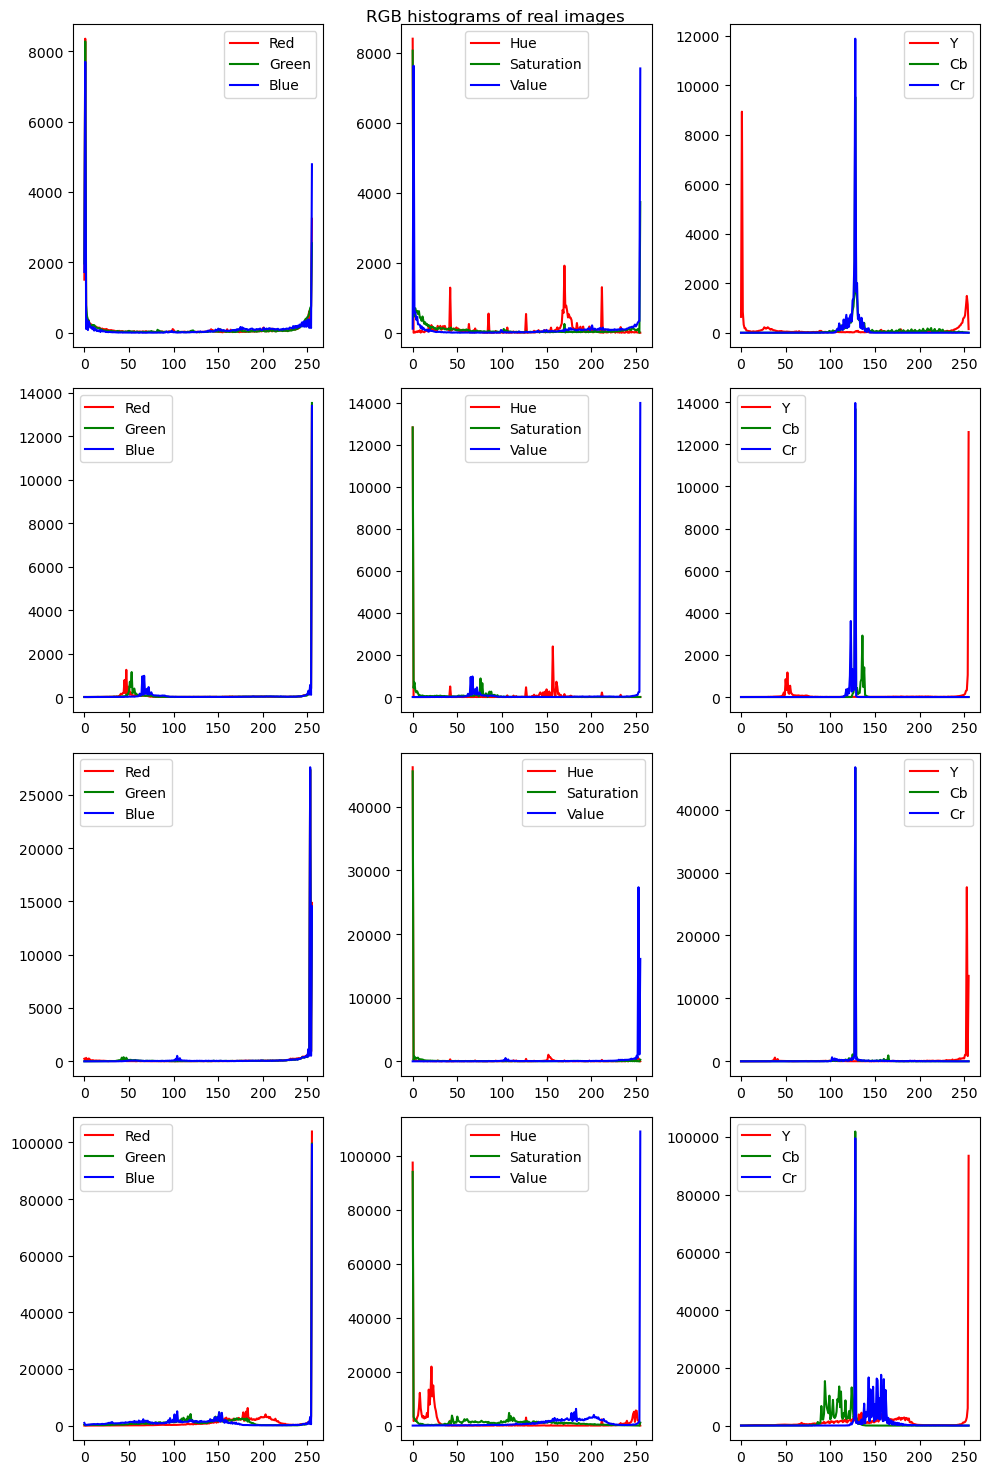

In [29]:
fig, axs = plt.subplots(n_images,3,figsize=(10,15))
fig.suptitle("RGB histograms of real images")
fig.set_tight_layout(True)

def label(j: int):
    match j:
        case 0:
            return ("Red","Green","Blue")
        case 1:
            return ("Hue","Saturation","Value")
        case 2:
            return ("Y","Cb","Cr")

for i in range(n_images):
    for j in range(3):
        axs[i,j].plot(real_histograms[i][j][0],"-r",label=label(j)[0])
        axs[i,j].plot(real_histograms[i][j][1],"-g",label=label(j)[1])
        axs[i,j].plot(real_histograms[i][j][2],"-b",label=label(j)[2])
        axs[i,j].legend()
    # axs[i,2].imshow(np.asarray(real_images[i]))
    # axs[i,2].set_xticks([])
    # axs[i,2].set_yticks([])
plt.show()

In [30]:
type(real_histograms[0][0])

numpy.ndarray

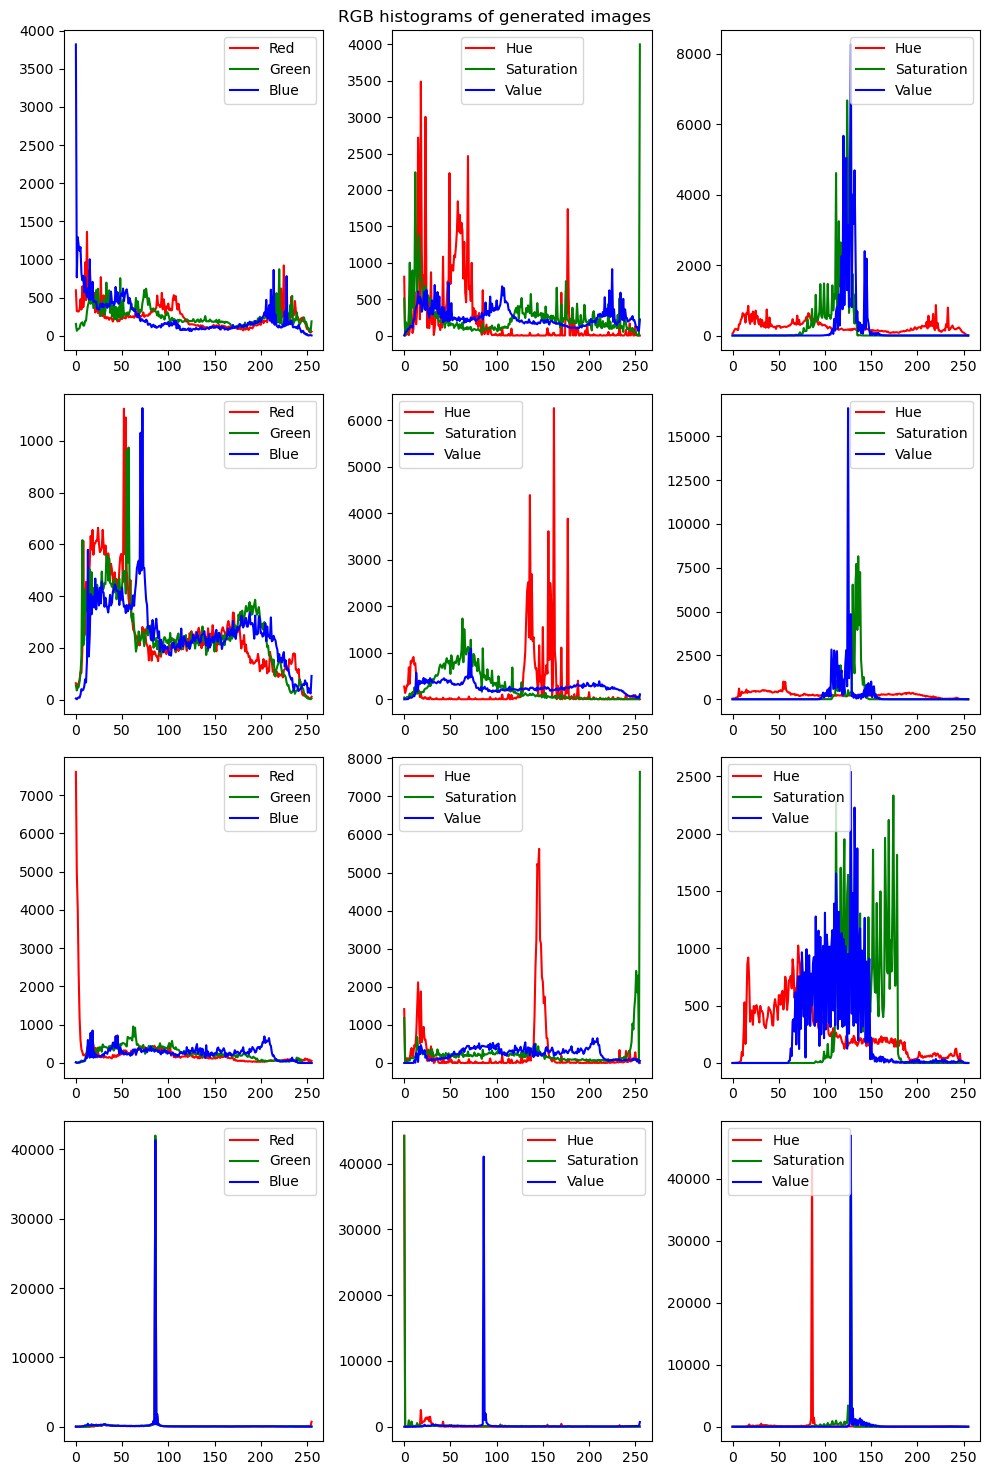

In [31]:
fig, axs = plt.subplots(n_images,3,figsize=(10,15))
fig.suptitle("RGB histograms of generated images")
fig.set_tight_layout(True)
label = lambda j : ("Red", "Green", "Blue") if j == 0 else ("Hue","Saturation","Value")
for i in range(n_images):
    for j in range(3):
        axs[i,j].plot(fake_histograms[i][j][0],"-r",label=label(j)[0])
        axs[i,j].plot(fake_histograms[i][j][1],"-g",label=label(j)[1])
        axs[i,j].plot(fake_histograms[i][j][2],"-b",label=label(j)[2])
        axs[i,j].legend()
plt.show()

## RGB -> YCbCr

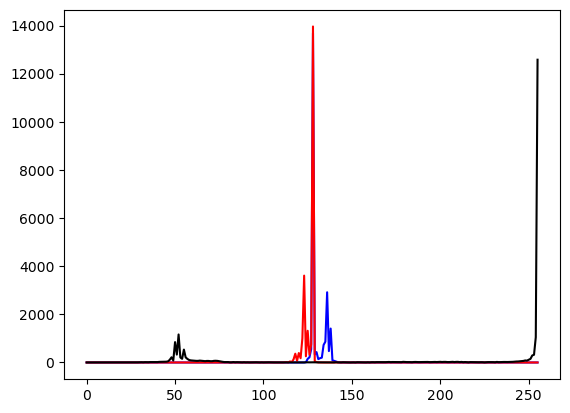

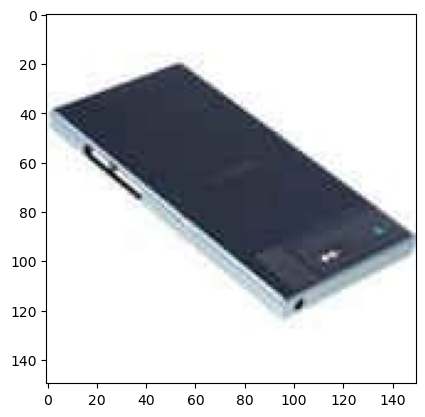

In [33]:
img = real_images[1]
y, cb, cr = img.convert("YCbCr").split()
y, cb, cr = get_histograms(img=img,mode="YCbCr")
plt.plot(cb,"-b")
plt.plot(cr,"-r")
plt.plot(y,"-k")
plt.show()
plt.imshow(np.asarray(img))

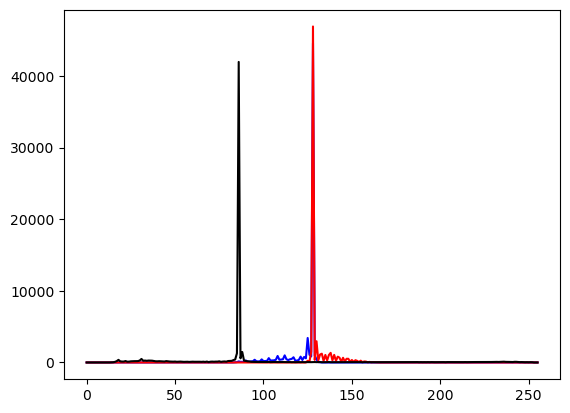

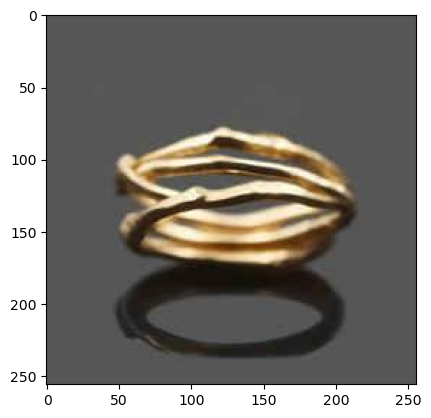

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 14, 10, 8, 24, 48, 151, 86, 85, 93, 280, 149, 96, 159, 167, 378, 173, 150, 166, 432, 191, 203, 215, 606, 270, 292, 300, 377, 910, 377, 406, 446, 993, 447, 337, 446, 504, 728, 250, 271, 359, 815, 347, 775, 582, 3420, 1079, 848, 44572, 969, 436, 57, 30, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [34]:
img = fake_images[3]
y, cb, cr = img.convert("YCbCr").split()
y, cb, cr = get_histograms(img=img,mode="YCbCr")
plt.plot(cb,"-b")
plt.plot(cr,"-r")
plt.plot(y,"-k")
plt.show()
plt.imshow(np.asarray(img))
plt.show()
print(cb)

In [37]:
img_ycbcr = np.asarray(fake_images[3].convert("YCbCr"))
hist_cb, bin_edges_cb = np.histogram(img_ycbcr[:,:,1],bins=30)

In [38]:
img_ycbcr[:,:,1].shape

(256, 256)

In [40]:
hist, bin_edges = np.histogram(img_ycbcr[:,:,1].flatten(),bins=64,density=True)
hist

array([1.74386161e-05, 1.74386161e-05, 3.48772321e-05, 0.00000000e+00,
       2.44140625e-04, 1.74386161e-04, 1.39508929e-04, 0.00000000e+00,
       4.18526786e-04, 8.37053571e-04, 2.63323103e-03, 1.49972098e-03,
       1.48228237e-03, 1.62179129e-03, 4.88281250e-03, 0.00000000e+00,
       2.59835379e-03, 1.67410714e-03, 2.77273996e-03, 2.91224888e-03,
       6.59179688e-03, 3.01688058e-03, 2.61579241e-03, 0.00000000e+00,
       2.89481027e-03, 7.53348214e-03, 3.33077567e-03, 3.54003906e-03,
       3.74930246e-03, 1.05678013e-02, 4.70842634e-03, 0.00000000e+00,
       5.09207589e-03, 5.23158482e-03, 6.57435826e-03, 1.58691406e-02,
       6.57435826e-03, 7.08007812e-03, 7.77762277e-03, 0.00000000e+00,
       1.73165458e-02, 7.79506138e-03, 5.87681362e-03, 7.77762277e-03,
       8.78906250e-03, 1.26953125e-02, 4.35965402e-03, 0.00000000e+00,
       4.72586496e-03, 6.26046317e-03, 1.42124721e-02, 6.05119978e-03,
       1.35149275e-02, 1.01492746e-02, 5.96400670e-02, 0.00000000e+00,
      